# Scalar Fields

The scalar fields class essentially implements class for functions over some $d$-dimensional vector space $\mathbb{R}^d$.  In physics these are scalar fields, which we want to study the dynamics of.  The scalar fields class implements a large suite of useful operations including various methods for approximating derivatives and integrals, computing topological invariants, imposing a dynamics and the algebra of functions.

A scalar field $\phi(x)$ is a function over some $d$-dimensional vector space $\mathbf{X} \subseteq \mathbb{R}^d$, whose points are written as $x \in \mathbf{X}$.  For most practical purposes, it is assumed that the scalar fields we are interested in belong to the subset of smooth functions over $\mathbf{X}$, i.e. $\phi(x) \in \Phi \subseteq C^{\infty}(\mathbf{X})$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# we'll need Matrix, UGrid, and Interpolator
from etraj import Vector, Matrix, UGrid, Interpolator, ScalarField
import etraj

We can see what the various methods are that are available from Grid by printing out some of its contents using \__dir\__,

In [2]:
# grab the attributes of Grid
attributes = dir(ScalarField)
attributes = [a for a in attributes if a[0] != "_"]

# print the ones which are not built in
print("#: function")
print("++++++++++++++++++")
for i in range(len(attributes)):
    print("%s: %s()" % (i+1,attributes[i]))

#: function
++++++++++++++++++
1: DiffEQ()
2: Grid()
3: Integrator()
4: Interpolator()
5: N()
6: access_field()
7: construct_local_field_values()
8: data()
9: dim()
10: flag()
11: get_DiffEQ()
12: get_Grid()
13: get_Integrator()
14: get_Inteprolator()
15: get_N()
16: get_dim()
17: get_field()
18: get_flag()
19: get_info()
20: get_log()
21: get_name()
22: info()
23: log()
24: log_output()
25: name()
26: set_DiffEQ()
27: set_Grid()
28: set_Integrator()
29: set_Interpolator()
30: set_N()
31: set_dim()
32: set_field()
33: set_flag()
34: set_info()
35: set_log()
36: set_name()


## Constructors

In [3]:
# Basic constructor
S = ScalarField()

# summary information
print(S)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField<double> ref at 0x56033dc328d0>
---------------------------------------------------
<ET::ScalarField<double> object at 0x56033dc328d0>
---------------------------------------------------
   name: 'default'
    dim: 1
      N: 0
---------------------------------------------------
        Grid at: 0x56033e7d3fb0,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
Interpolator at: 0x56033e7d75c0,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
      DiffEQ at: 0x56033e7d5f30,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
  Integrator at: 0x56033e66f160,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
      Logger at: 0x56033dd914f0,
         ref at: 0x7fffaf5e8510
++++++++++++++++++++++++++++++++++++++++++++++++++++


In [24]:
# Constructor with a UGrid
# create a uniformly random one-dimensional grid
# between -5 and 5 with N = 10000 points.
N = 500
x = [[np.random.uniform(-2*np.pi,2*np.pi,1)[0]] for i in range(N)]

# next, create the grid of microstates for this 
# set of points.
g = UGrid(x)

S = ScalarField(g,g.log)
print(g)
print(S)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.UGrid<double> ref at 0x56033e04f4d0>
---------------------------------------------------
<ET::UGrid<double> object at 0x56033e04f4d0>
---------------------------------------------------
   name: 'default'
    dim: 1
      N: 500
---------------------------------------------------
 KDTree at: 0x7fffaf5e8620,
---------------------------------------------------
 Logger at: 0x56033f21ffa0,
    ref at: 0x7fffaf5e85b0
++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField<double> ref at 0x56033dc328d0>
---------------------------------------------------
<ET::ScalarField<double> object at 0x56033dc328d0>
---------------------------------------------------
   name: 'default'
    dim: 1
      N: 500
---------------------------------------------------
        Grid at: 0x56033e04f4d0,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
I

In [5]:
# Constructor with UGrid and field values
f = np.cos(x)

S = ScalarField(name='f(x) = cos(x)',Grid=g,field=f)
print(S)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField<double> ref at 0x56033dc328d0>
---------------------------------------------------
<ET::ScalarField<double> object at 0x56033dc328d0>
---------------------------------------------------
   name: 'f(x) = cos(x)'
    dim: 1
      N: 500
---------------------------------------------------
        Grid at: 0x56033e448b10,
         ref at: 0x7fffaf5e7c80
---------------------------------------------------
Interpolator at: 0x56033e7d3fb0,
         ref at: 0x7fffaf5e7c80
---------------------------------------------------
      DiffEQ at: 0x56033e7d5f30,
         ref at: 0x7fffaf5e7c80
---------------------------------------------------
  Integrator at: 0x56033e66f160,
         ref at: 0x7fffaf5e7c80
---------------------------------------------------
      Logger at: 0x56033dd914f0,
         ref at: 0x7fffaf5e7c80
++++++++++++++++++++++++++++++++++++++++++++++++++++


## Attributes for scalar fields

In [6]:
# 

## The algebra of functions

The ScalarField class comes equipped with an assortment of operator overloads.  These include the standard addition and multiplication of two fields, as well as addition and multiplication by scalars.  The following gives some examples of the use of these operators.

Let's first take a look at a set of one-dimensional examples.

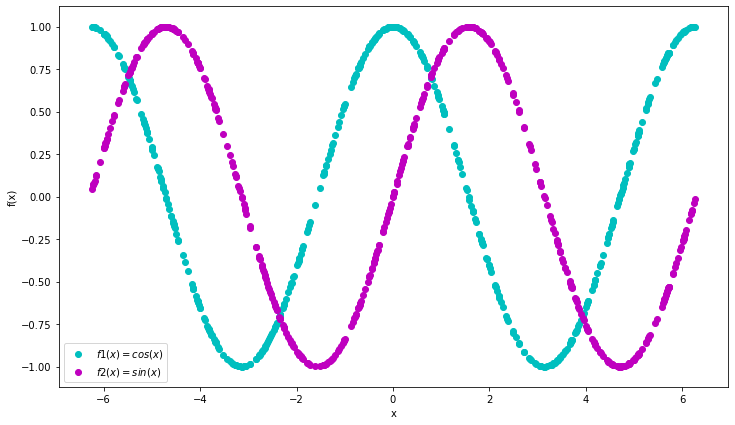

In [7]:
# Adding two scalar fields

# Two scalar fields over the same grid can be added
S1 = ScalarField('cos(x)',np.cos(x),g)
S2 = ScalarField('sin(x)',np.sin(x),g)

f1 = S1.get_field()
f2 = S2.get_field()

# Let's see what these two fields look like
fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,f1,color='c',label=r'$f1(x)=cos(x)$')
axs.scatter(x,f2,color='m',label=r'$f2(x)=sin(x)$')
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

In [8]:
# Now let's add the two fields together
S3 = S1 + S2
print(S3)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField<double> ref at 0x56033db0fc00>
---------------------------------------------------
<ET::ScalarField<double> object at 0x56033db0fc00>
---------------------------------------------------
   name: 'default'
    dim: 1
      N: 500
---------------------------------------------------
        Grid at: 0x56033e448b10,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
Interpolator at: 0x56033e93e450,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
      DiffEQ at: 0x56033ea2aba0,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
  Integrator at: 0x56033ea2ac60,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
      Logger at: 0x56033da39ae0,
         ref at: 0x7fffaf5e8510
++++++++++++++++++++++++++++++++++++++++++++++++++++


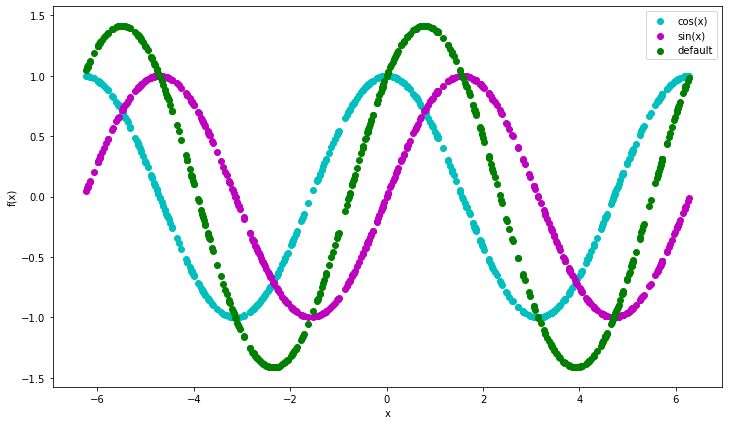

In [9]:
# The result is
f3 = S3.get_field()

fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,f1,color='c',label=S1.get_name())
axs.scatter(x,f2,color='m',label=S2.get_name())
axs.scatter(x,f3,color='g',label=S3.get_name())
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

In [10]:
# While it will not crash the program, manipulating 
# scalar fields with different underlying UGrids will lead
# to a warning and is not advised.
g1 = UGrid(x)
g2 = UGrid(x)

SG1 = ScalarField('SG1',np.cos(x),g1)
SG2 = ScalarField('SG2',np.sin(x),g2)

SG1 += SG2

In [11]:
SG1.log_output()

[18:13:17] [trace] ET:Field:SG1: Field 'SG1' created at location 0x56033e9b1350
[18:13:17] [trace] ET:Field:SG1: Interpolator 'default' created at location 0x56033ea1d900
[18:13:17] [info] ET:Field:SG1: Logger passed to Interpolator 'default'
[18:13:17] [warning] ET:Field:SG1: Grids for t_scalar fields SG1 and SG2 do not match



In [12]:
# Subtraction works in the same way
S4 = S1 - S2
print(S4)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField<double> ref at 0x56033e9bc9d0>
---------------------------------------------------
<ET::ScalarField<double> object at 0x56033e9bc9d0>
---------------------------------------------------
   name: 'default'
    dim: 1
      N: 500
---------------------------------------------------
        Grid at: 0x56033e448b10,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
Interpolator at: 0x56033e8a6f50,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
      DiffEQ at: 0x56033e987550,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
  Integrator at: 0x56033e93f1a0,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
      Logger at: 0x56033da39ae0,
         ref at: 0x7fffaf5e8510
++++++++++++++++++++++++++++++++++++++++++++++++++++


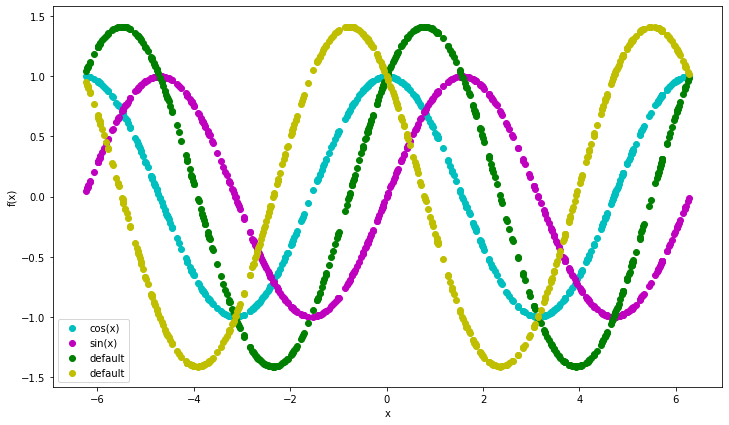

In [13]:
# The result is
f4 = S4.get_field()

fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,f1,color='c',label=S1.get_name())
axs.scatter(x,f2,color='m',label=S2.get_name())
axs.scatter(x,f3,color='g',label=S3.get_name())
axs.scatter(x,f4,color='y',label=S4.get_name())
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

In [14]:
# We can also multiply two scalar fields
S5 = S1 * S2
print(S5)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField<double> ref at 0x56033e9c0a60>
---------------------------------------------------
<ET::ScalarField<double> object at 0x56033e9c0a60>
---------------------------------------------------
   name: 'default'
    dim: 1
      N: 500
---------------------------------------------------
        Grid at: 0x56033e448b10,
         ref at: 0x7fffaf5e7c80
---------------------------------------------------
Interpolator at: 0x56033ea9a7b0,
         ref at: 0x7fffaf5e7c80
---------------------------------------------------
      DiffEQ at: 0x56033e89cc70,
         ref at: 0x7fffaf5e7c80
---------------------------------------------------
  Integrator at: 0x56033e89cf90,
         ref at: 0x7fffaf5e7c80
---------------------------------------------------
      Logger at: 0x56033da39ae0,
         ref at: 0x7fffaf5e7c80
++++++++++++++++++++++++++++++++++++++++++++++++++++


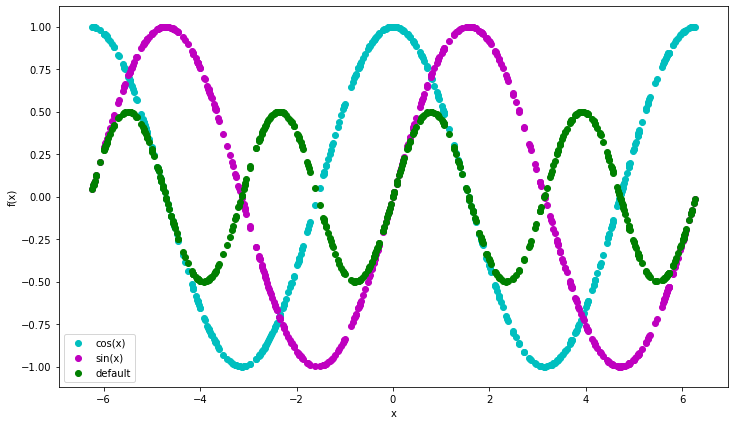

In [15]:
# The result is
f5 = S5.get_field()

fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,f1,color='c',label=S1.get_name())
axs.scatter(x,f2,color='m',label=S2.get_name())
axs.scatter(x,f5,color='g',label=S5.get_name())
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

In [16]:
# We can also divide two scalar fields whenever
# their functional form does not cross f(x) = 0.
g = UGrid(x)

SD1 = ScalarField('2.0',[2.0 for i in range(len(x))],g)
SD2 = ScalarField('exp(x)',np.exp(x),g)
SD3 = SD1 / SD2
print(SD3)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField<double> ref at 0x56033e7e7270>
---------------------------------------------------
<ET::ScalarField<double> object at 0x56033e7e7270>
---------------------------------------------------
   name: 'default'
    dim: 1
      N: 500
---------------------------------------------------
        Grid at: 0x56033e2a1270,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
Interpolator at: 0x56033eb40820,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
      DiffEQ at: 0x56033e7d7cc0,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
  Integrator at: 0x56033ef71e10,
         ref at: 0x7fffaf5e8510
---------------------------------------------------
      Logger at: 0x56033ea0b7e0,
         ref at: 0x7fffaf5e8510
++++++++++++++++++++++++++++++++++++++++++++++++++++


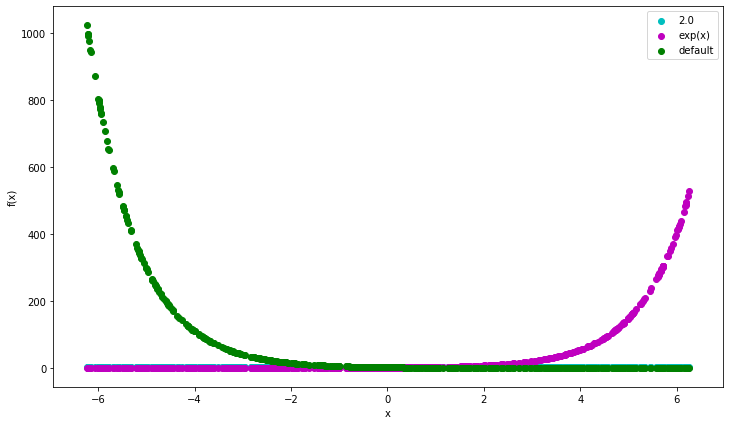

In [17]:
# The result is
fd1 = SD1.get_field()
fd2 = SD2.get_field()
fd3 = SD3.get_field()

fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,fd1,color='c',label=SD1.get_name())
axs.scatter(x,fd2,color='m',label=SD2.get_name())
axs.scatter(x,fd3,color='g',label=SD3.get_name())
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

## Calculus over scalar fields

## Integration

AttributeError: 'etraj.Integrator' object has no attribute 'scalar_RK4_step'

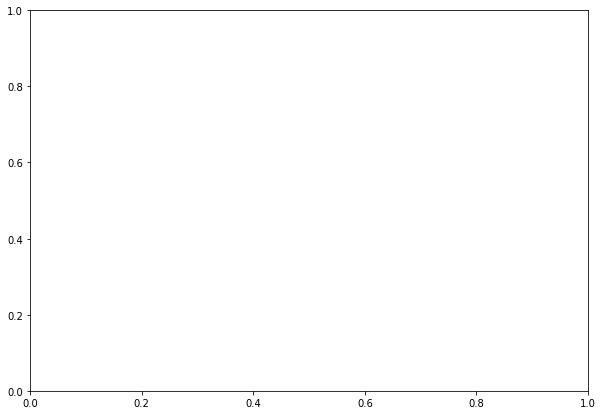

In [18]:
# first import the integrator
from etraj import Integrator
fig,axs = plt.subplots(figsize=(10,7))
for i in range(100):
    SD2.get_Integrator().scalar_RK4_step(g,SD2,0.1)
    if i % 10 == 0:
        axs.scatter(x,SD2.get_field())